## Project 8- MISY408

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Titanic.csv to Titanic.csv


### Titanic Dataset

**Attributes**

* Survived: 0 = Not survived, 1 = Survived
* Pclass: Ticket class 1 = 1st class, 2 = 2nd class, 3 = 3rd class
* Name: Name of passenger
* Sex: male, female
* Age: Age of passenger
* Sibsp: # of siblings / spouses aboard the Titanic
* Parch: # of parents / children aboard the Titanic
* Ticket: Ticket number
* Fare: Passenger fare
* Cabin: Cabin number
* Embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

**Question1: Import the required libraries and read Titanic.csv file and save it in df dataframe, display the first 5 rows of df dataframe**

In [4]:
import pandas as pd
df = pd.read_csv('Titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Question 2: Exploratory data analysis.**

a. Check the shape of dataset
    

In [5]:
df.shape

(891, 12)

b. Check whether there is any missing values
   

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

From the above code's output, you'll notice that There are missing values for 'Age', 'Cabin' and 'Embarked' columns. I dropped 'Cabin' column since it has too many missing values. I replaced missing values in 'Age' column with the average of other values in that column, and I replaced the missing values in Embarked column with 'S' since 'S' is the most frequennt Embarked place. **Please run the following codes before moving forward.**

In [7]:
df.drop('Cabin', axis = 1, inplace = True)

In [8]:
df['Age'].fillna(df['Age'].mean(), inplace = True)

In [9]:
df['Embarked'].fillna('S', inplace = True)

In [10]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

**Question 3: Drop PassengerId, Name, and Ticket from df dataframe and then display first 5 rows of df dataframe**

In [11]:
df = df.drop(['PassengerId','Name', 'Ticket'], axis=1)
df.head()
     

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


**Question 4: Please run the following cell and then type a code to get dummies for categorical variables in df dataframe and save it to df2. Then,  display first 5 rows of df2 (type your code after the code that I provided (in the empty cell))**

In [12]:
df['Pclass']= df['Pclass'].astype('category')

In [13]:
df2 = pd.get_dummies(df)
df2.head()


,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


**Question 5: Scale columns with continuous values (The followings are some hints on how to scale the values).** 
* Create a dataframe that only includes columns with continious data and  scale the continuous data. Save the scaled data into scaled_array
* Convert the scaled_array to the scaled dataframe and name it scaled_df
* Show the statistical summary of scaled_df using describe() method

**DO NOT SCALE cloumns with binary values**

In [14]:
temp = df[['Age','Fare']]

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_array = scaler.fit_transform(temp)

In [16]:
scaled_df = pd.DataFrame(scaled_array, columns=['Age', 'Fare']) # convert back to dataframe!
scaled_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,891.0,2.232906e-16,1.000562,-2.253155,-0.592481,0.000000,0.407926,3.870872
Fare,891.0,3.987333e-18,1.000562,-0.648422,-0.489148,-0.357391,-0.024246,9.667167


**Question 6: Store the binary features in the scaled_df dataframe and display the first 5 rows of scaled_df**

In [17]:
scaled_df[['Survived','SibSp', 'Parch', 'Pclass_1','Pclass_2','Pclass_3','Sex_female','Sex_male','Embarked_C','Embarked_Q','Embarked_S']] = df2[['Survived','SibSp', 
'Parch', 'Pclass_1','Pclass_2','Pclass_3','Sex_female','Sex_male','Embarked_C','Embarked_Q','Embarked_S']]
scaled_df.head()


,Age,Fare,Survived,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,-0.592481,-0.502445,0,1,0,0,0,1,0,1,0,0,1
1,0.638789,0.786845,1,1,0,1,0,0,1,0,1,0,0
2,-0.284663,-0.488854,1,0,0,0,0,1,1,0,0,0,1
3,0.407926,0.420730,1,1,0,1,0,0,1,0,0,0,1
4,0.407926,-0.486337,0,0,0,0,0,1,0,1,0,0,1


**Question 7: Set up the X and Y: Set Y to Survived and set X to all variables in the scaled_df dataframe: 'Age', 'Fare','Pclass_1', 'Pclass_2','Pclass_3', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'**

In [18]:
X = scaled_df[['Age', 'Fare', 'Survived','SibSp', 'Parch', 'Pclass_1','Pclass_2','Pclass_3','Sex_female','Sex_male',
               'Embarked_C','Embarked_Q','Embarked_S']].copy()
Y = scaled_df['Survived'].copy()

**Question 8: Split the dataset into the Training set and Test set (30 percent Test, 70 percent Train)**

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

* Check the shape of your X_train

In [20]:
X_train.shape

(623, 13)

* Check the shape of your X_test

In [21]:
X_test.shape

(268, 13)

**Question 9**

a. Import required Keras Libraries

In [22]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.layers import BatchNormalization

b. Declare your final model architecture

(you can start by having 1 hidden layer and 4 nodes in the hidden layer and compile the model. After getting the accuracy, you can add more hidden layers and nodes to the model to improve the accuracy of your model. If adding more hidden layers and nodes does not improve the accuracy of the model or if it results in model overfit, do not add more hidden layers or nodes). At the end of the notebook you should explain what architectures you tried and what you did to improve your model)

In [23]:
model = Sequential() #1

# input_dim refers to number of nodes in the input layer.  
# Number after Dense refers to number of neurons/nodes in the hidden layer
# input and hidden layers.  Use relu, which is common for hidden layers

model.add(Dense(9, activation='relu', input_dim=X_train.shape[1], name='first_hidden')) 
model.add(Dropout(0.2))
model.add(BatchNormalization())  # Re-centers the results to ensure they dont drift


# output layer: use sigmoid since outputting a probability. Only one node
model.add(Dense(1, activation='sigmoid', name='output'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_hidden (Dense)        (None, 9)                 126       
                                                                 
 dropout (Dropout)           (None, 9)                 0         
                                                                 
 batch_normalization (BatchN  (None, 9)                36        
 ormalization)                                                   
                                                                 
 output (Dense)              (None, 1)                 10        
                                                                 
Total params: 172
Trainable params: 154
Non-trainable params: 18
_________________________________________________________________


c. In the following, explain your final model architecture.

In your explanaition, please include these:  how many neurons you have in the input layer (and why), how many hidden layers you have, how many neurons you have in each hidden layer, how many neurons you have in output layer (and why), what activation fuction you used for hiddel layer, and what activation function you used for output layer (and why).

Since there are 13 columns in the X_train set, there are 13 neurons. I chose 2 hidden layers with 9 neurons each. I used the rule of thumb for this: 2/3 times the input layer and adding that to the output layer. In the output layer, there is 1 neuron since it's binary. I used relu as the function for activation for hidden layers since it's very simple to use and does a really good job. For the output layer, I used sigmoid since this is a probability that will be between 0 and 1. Sigmoid is good to use with probabilities. 

d. Compile the model

In [24]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

**Question 10:**

a. Train the Model Using Training Data Set (you can start by 100  epochs and 10 batch_size. After getting the accuracy, you can increase these values to improve the accuracy of your model. But, make sure not to overfit the model. At the end of the notebook you should explain what you tried and what you did to improve your model)
* Set verbose to 0.

In [25]:
history = model.fit(X_train, Y_train, batch_size =10,validation_data=(X_test,Y_test), epochs = 30, verbose=0)


b. Print the Model Accuracy and Loss for Training Data

In [26]:
loss, accuracy = model.evaluate(X_train, Y_train)
print('Loss: %.2f'% (loss))
print('Accuracy: %.2f'% (accuracy*100))


20/20 [==============================] - 0s 1ms/step - loss: 0.0067 - accuracy: 1.0000
Loss: 0.01
Accuracy: 100.00


c. Create a Confusion Matrix for Training Data

In [27]:
import numpy as np
predictions_train= np.argmax(model.predict(X_train), axis=1) 
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_train,predictions_train)


20/20 [==============================] - 0s 1ms/step


array([[381,   0],
       [242,   0]])

d. Interpret the above confusion matrix

In the output from train data, of the 381 people who did not survive, the model predicted all of them correctly and of the 242 that did survive, the model also predicted all of them correctly.

**Question 11:**

a. Print the Model Accuracy and Loss for Test Data

In [28]:
loss, accuracy = model.evaluate(X_test, Y_test)
print('Loss: %.2f'% (loss))
print('Accuracy: %.2f'% (accuracy*100))


9/9 [==============================] - 0s 2ms/step - loss: 0.0074 - accuracy: 1.0000
Loss: 0.01
Accuracy: 100.00


b. Create a Confusion Matrix for Test Data

In [29]:
import numpy as np

predictions_test = np.argmax(model.predict(X_test), axis=1)
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,predictions_test)


9/9 [==============================] - 0s 2ms/step


array([[168,   0],
       [100,   0]])

c. Interpret the above confusion matrix

In the output from test data, of the 168 people who did not survive, the model predicted all of them correctly and of the 100 that did survive, the model also predicted all of them correctly.

**Question 12:**

a. Visualize Accurancy for train and test

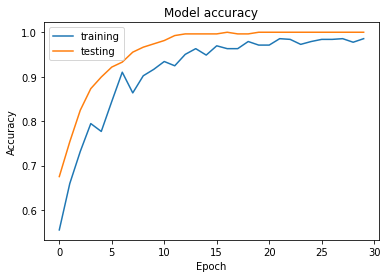

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['accuracy'], label='training')
plt.plot(history.history['val_accuracy'], label='testing')
plt.title('Model accuracy')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()


b. Visualize Loss for train and test

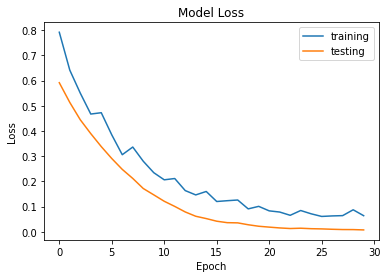

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['loss'], label='training')
plt.plot(history.history['val_loss'], label='testing')
plt.title('Model Loss')
plt.legend()
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()


**Question 13: Please explain what other neural network architectures did you try (how many hidden layers, neurons, epochs, and barch size they had)? Why did you decide to go with this final architecture? Does your final architecture have better accuracy compared to the other ones that you tried?**

I tried different numbers for these. I had 100% accurate model with train and test set results and I messed around with the epochs. I dropped it to 30 and still got 100%. At 100, it was still 100%. I went ahead and changed the number of neurons to 8 and 7 and even even used a second hidden layer. My results were still very good but I thought it was best to remove the second hidden layer and sticking to 9 neurons. I kept the epochs at 30 because it works well with the current model. Having 9 neurons and the epochs at 30 and one hidden layer worked well. 

**Question 14: Does your final model have overfitting problem? Why?**

No, this model does not have an overfitting problem because the accuracy for both test data and train data are very similar. 
